In [8]:
load('.RData')

In [9]:
head(df)

,Mouse,Sample,Genotype,Treatment,Behavior,class,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,⋯,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
309_1,309,1,Control,Memantine,CS,cCSm,0.5036439,0.7471932,0.4301753,2.816329,⋯,0.2475378,1.603310,2.014875,0.1082343,1.0449792,0.8315565,0.1888517,0.1063052,0.4270992,1.675652
309_2,309,2,Control,Memantine,CS,cCSm,0.5146171,0.6890635,0.4117703,2.789514,⋯,0.2576322,1.671738,2.004605,0.1097485,1.0098831,0.8492704,0.2004036,0.1065922,0.4415813,1.743610
309_3,309,3,Control,Memantine,CS,cCSm,0.5091831,0.7302468,0.4183088,2.687201,⋯,0.2553430,1.663550,2.016831,0.1081962,0.9968476,0.8467087,0.1936845,0.1083031,0.4357769,1.926427
309_4,309,4,Control,Memantine,CS,cCSm,0.4421067,0.6170762,0.3586263,2.466947,⋯,0.2511031,1.484624,1.957233,0.1198832,0.9902247,0.8332768,0.1921119,0.1031838,0.3916910,1.700563
309_5,309,5,Control,Memantine,CS,cCSm,0.4349402,0.6174298,0.3588022,2.365785,⋯,0.2517730,1.534835,2.009109,0.1195244,0.9977750,0.8786678,0.2056042,0.1047838,0.4341538,1.839730
309_6,309,6,Control,Memantine,CS,cCSm,0.4475064,0.6281758,0.3673881,2.385939,⋯,0.2444853,1.507777,2.003535,0.1206872,0.9201782,0.8436793,0.1904695,0.1064762,0.4398331,1.816389


In [10]:
df_byclass <- aggregate(df[, proteinas], list(df$class), median)
df_byclass

Group.1,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,⋯,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cCSm,0.4722972,0.6405912,0.3336642,2.391115,4.258744,0.2270515,0.1826712,2.698185,0.1984255,⋯,0.3080547,1.532005,2.207417,0.1505569,1.183420,0.8595491,0.2287316,0.1197665,0.4648746,1.572257
cCSs,0.4072277,0.5888439,0.3387715,2.332746,3.998902,0.2091828,0.1706086,2.858733,0.2019239,⋯,0.2946034,1.468085,2.074573,0.1438126,1.086230,0.8531698,0.2165559,0.1138649,0.4348090,1.565046
cSCm,0.2750854,0.4376960,0.2918835,2.124527,3.359592,0.2344528,0.1835976,4.671556,0.2072114,⋯,0.2706915,1.641157,2.404394,0.1716367,1.410563,0.8260092,0.2147738,0.1274153,0.4682467,1.007969
cSCs,0.2744429,0.4547522,0.3148119,2.442128,3.878765,0.2343934,0.1855325,3.235436,0.2123184,⋯,0.2914648,1.514994,2.387490,0.1698008,1.291546,0.8068823,0.2364643,0.1327924,0.4749482,1.182216
tCSm,0.6137469,0.7866267,0.3171118,2.217863,3.572717,0.2132263,0.1730205,2.371592,0.2043582,⋯,0.2790698,1.424696,2.200717,0.1346134,1.092369,0.8939861,0.2188073,0.1081582,0.4169375,1.647314
tCSs,0.4749263,0.7320108,0.2951076,2.147198,3.558131,0.2087348,0.1630333,2.322522,0.2063764,⋯,0.2971116,1.410653,2.175812,0.1517906,1.193207,0.8449373,0.2197216,0.1116577,0.4198121,1.591999
tSCm,0.3244654,0.5675817,0.3180742,2.406845,4.029405,0.2623643,0.1988706,4.325740,0.2340543,⋯,0.2838526,1.704913,2.438743,0.1755271,1.429538,0.8400686,0.2261493,0.1381421,0.4500923,1.061176
tSCs,0.3478928,0.5519377,0.3227566,2.248275,3.418932,0.2455549,0.1873513,3.777065,0.2305002,⋯,0.3146840,1.518634,2.199621,0.1550908,1.262790,0.8977630,0.2342897,0.1182072,0.4190605,1.230813


In [11]:
calculateFC <- function(grupo1, grupo2) {
    foldchangeData <- c()
    pValues <- c()
    
    df_volcano <- data.frame(variable = proteinas)
    for (proteina in proteinas){
        foldchange <- df_byclass[df_byclass[1] == grupo1, proteina] / df_byclass[df_byclass[1] == grupo2, proteina]
        foldchangeData <- c(foldchangeData, foldchange)
        res <- wilcox.test(df[df$class == grupo1, proteina], df[df$class == grupo2, proteina])
        pValues <- c(pValues, res$p.value)
    }
    
    padjust <- p.adjust(pValues, method = 'fdr')
    df_volcano <- cbind(df_volcano, foldchangeData)
    df_volcano <- cbind(df_volcano, padjust)
    df_volcano$log2FoldChange <- log2(df_volcano$foldchangeData)
    
    df_volcano
}

In [12]:
df_volcano <- calculateFC('cCSs', 'cSCs')
head(df_volcano)

,variable,foldchangeData,padjust,log2FoldChange
,<chr>,<dbl>,<dbl>,<dbl>
1,DYRK1A_N,1.4838340,1.990916e-28,0.56932970
2,ITSN1_N,1.2948677,2.895137e-22,0.37280465
3,BDNF_N,1.0761079,7.810568e-04,0.10582276
4,NR1_N,0.9552106,2.582182e-01,-0.06610926
5,NR2A_N,1.0309731,9.608645e-02,0.04400672
6,pAKT_N,0.8924433,2.924000e-03,-0.16416755


In [16]:
library('EnhancedVolcano')

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


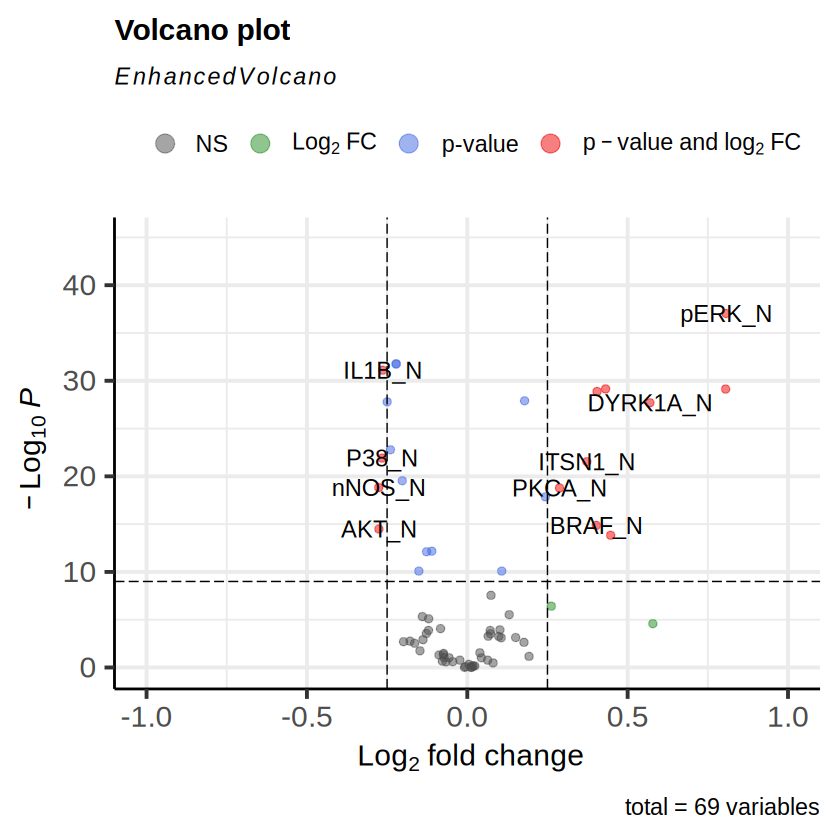

In [17]:
p1 <- EnhancedVolcano(df_volcano, 
                lab = df_volcano$variable,
                x = 'log2FoldChange',
                y = 'padjust',
                FCcutoff = 0.25,
                pCutoff = 10e-10
               )

p1 +
    ggplot2::coord_cartesian(xlim=c(-1, 1))

https://bioconductor.org/packages/release/bioc/vignettes/EnhancedVolcano/inst/doc/EnhancedVolcano.html#plot-the-most-basic-volcano-plot